<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A6%9D%EA%B0%95_%EC%98%88%EC%A0%9C(Data_Augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


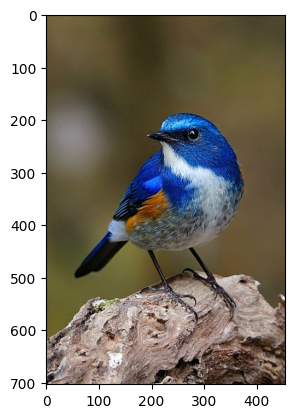

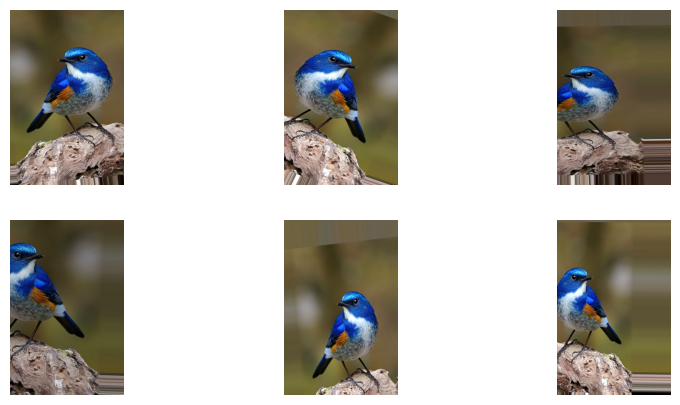

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg # Import the necessary library for loading images

from google.colab import drive
drive.mount('/content/drive')

image_path = "/content/drive/My Drive/Data/bird.jpg"  # 추론할 이미지 경로


# Load the image using mpimg.imread
sample_image = mpimg.imread(image_path)  # (32, 32, 3) 형태의 이미지
plt.imshow(sample_image) # imshow는 (32, 32, 3) 형태의 이미지를 기대합니다.

# 데이터 증강기 생성
datagen = ImageDataGenerator(
    rotation_range=30,    # 최대 30도 회전
    width_shift_range=0.2, # 가로 방향 이동 (20%)
    height_shift_range=0.2, # 세로 방향 이동 (20%)
    zoom_range=0.2,       # 확대/축소 (20%)
    horizontal_flip=True,  # 좌우 반전
    brightness_range=[0.8, 1.2]  # 밝기 조절
)


# 증강된 이미지 생성
# 배치 크기를 1로 지정하여 증강된 이미지를 생성합니다.
augmented_images = datagen.flow(np.expand_dims(sample_image, axis=0), batch_size=1) # 여기에서 차원을 추가합니다.

# 여러 개의 증강된 이미지 시각화
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    augmented_image = next(augmented_images)[0].astype('uint8') # next(augmented_images)는 (1, 32, 32, 3) 형태의 배치를 반환합니다. [0]으로 첫 번째 이미지를 선택합니다.
    plt.imshow(augmented_image)
    plt.axis('off')
plt.show()